In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Cargar datos
df = pd.read_csv('DraftCombine.csv')

# Gráfico de Caja
fig_box = go.Figure()
positions = ['PG', "PG-SG", "SG-PG", 'SG', "SG-SF", "SF-SG", 'SF', "SF-PF", "PF-SF", 'PF', "PF-C", "C-PF", 'C']
filtered_df = df[df['position'].isin(positions)][['position', 'height', "timeLaneAgility", "wingspan"]]

filtered_df.to_json('filtered_data.json', orient='records')

for position in positions:
    fig_box.add_trace(go.Box(y=df[df['position'] == position]['height'], name=position))
fig_box.update_layout(title='Distribución de Altura por Posición')
fig_box


/tmp/ipykernel_13239/1062327901.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



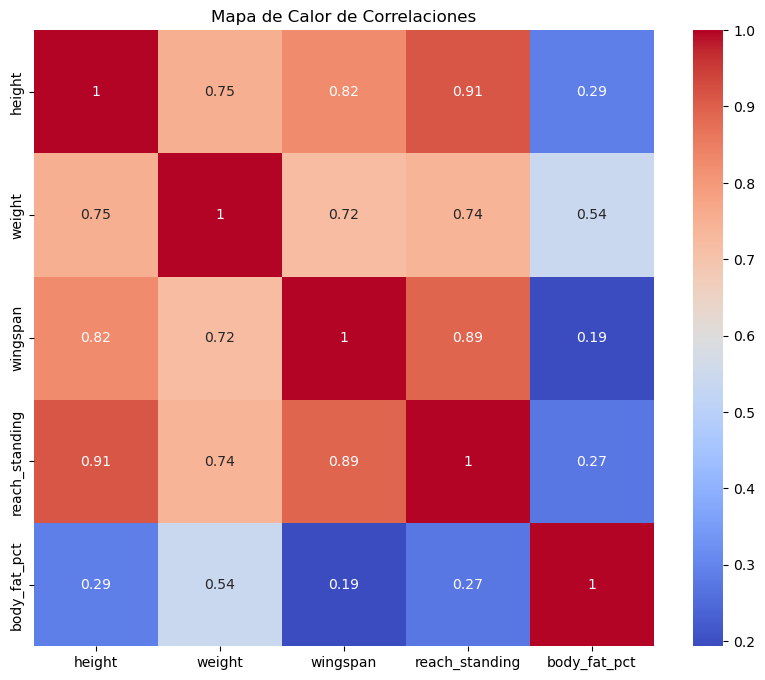

In [8]:
# Mapa de Calor
plt.figure(figsize=(10, 8))
corr_matrix = df[['height', "position", 'weight', 'wingspan', 'reach_standing', "body_fat_pct"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()